Notas:
- Investigar más la relación de rating_qty e year con el rating.

---

# RELATIONSHIP ANALYSIS (ANÁLISIS DE RELACIONES)

El objetivo de esta sección es entender cómo diversas variables se relacionan entre sí.

<br>

Se encarga de responder preguntas como:
- ¿Qué variables tienen mayor correlación con la calidad de un vino?
- ¿Qué sabores se relacionan con cierto maridaje con más frecuencia?
- ¿Existen características de un vino con alta correlación positiva o negativa entre si?

<br>

---

## Configuración General

1. Carga de librerías.
2. Seteo de estilos del notebook.
3. Ingesta del dataset.

In [1]:
import sys
import os
import statistics

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import matplotlib.pyplot as plt



sys.path.append(os.path.abspath(os.path.join('..', '..', 'src', 'utils')))
import utils as ut

In [2]:
# Seteo de estilos
plt.style.use("ggplot")
sns.set_palette("viridis")
plt.rcParams["figure.figsize"] = (9,6)

In [3]:
wines = pd.read_csv("../../src/data/transformed/wines_clean.csv")
pd.set_option('display.max_columns', None)
wines.head(3)

,wine_link,name,year,winery,rating,rating_qty,price,body,tannis,sweetness,acidity,style,alcohol,image,ageing,black fruit,citrus,dried fruit,earthy,floral,oaky,red fruit,spices,tree fruit,tropical,vegetal,yeasty,any junk food will do,aperitif,appetizers and snacks,beef,blue cheese,cured meat,"game (deer, venison)",goat's milk cheese,lamb,lean fish,mature and hard cheese,mild and soft cheese,mushrooms,pasta,pork,poultry,"rich fish (salmon, tuna etc)",shellfish,spicy food,veal,vegetarian,Albariño,Barbera,Bonarda,Béquignol Noir,Cabernet Franc,Cabernet Sauvignon,Cereza,Chardonnay,Chenin Blanc,Criolla Grande,Garnacha,Gewürztraminer,Grenache,Grüner Veltliner,Malbec,Malvasia,Marsanne,Mencia,Merlot,Moscatel,Mourvedre,Pais,Pedro Ximenez,Petit Verdot,Pinot Gris,Pinot Noir,Riesling,Roussanne,Sangiovese,Sauvignon Blanc,Shiraz/Syrah,Sémillon,Tannat,Tempranillo,Torrontés,Trousseau,Verdejo,Viognier,Agrelo,Argentina,Brazil,Cafayate Valley,Calchaqui Valley,Campanha,Famatina,Gualtallary,La Consulta,La Rioja,Las Compuertas,Lujan de Cuyo,Lunlunta,Maipu,Mendoza,Paraje Altamira,Patagonia,Pedernal Valley,Perdriel,Rio Grande do Sul,Rio Negro,Salta,San Carlos,San Juan,San Rafael,Serra Gaúcha,Tulum Valley,Tunuyán,Tupungato,Uco Valley,Vale dos Vinhedos,Vista Flores
0,https://www.vivino.com/US/en/luigi-bosca-parai...,Paraiso,2020.0,Luigi Bosca,4.8,582.0,188.33,0.7343,0.5090,0.1361,0.4474,Argentinian Cabernet Sauvignon - Malbec,0.1410,https://images.vivino.com/thumbs/_Bf6JTwYRpSX6...,0.0000,0.3500,0.000,0.000,0.1250,0.0500,0.3250,0.0500,0.1000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,https://www.vivino.com/US/en/catena-zapata-est...,Estiba Reservada,2015.0,Catena Zapata,4.7,297.0,675.00,0.7417,0.5583,0.1434,0.5445,Argentinian Bordeaux Blend,0.1400,https://images.vivino.com/thumbs/Yt464jw0QS-ug...,0.0241,0.2008,0.008,0.012,0.0964,0.0241,0.4378,0.0843,0.1004,0.0,0.0,0.004,0.008,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,https://www.vivino.com/US/en/catena-zapata-est...,Estiba Reservada,2017.0,Catena Zapata,4.7,219.0,580.00,0.7417,0.5583,0.1434,0.5445,Argentinian Bordeaux Blend,0.1416,https://images.vivino.com/thumbs/Yt464jw0QS-ug...,0.0241,0.2008,0.008,0.012,0.0964,0.0241,0.4378,0.0843,0.1004,0.0,0.0,0.004,0.008,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 01 | Matrices de Correlación

- ¿Qué variables tienen una alta correlación con el rating de los vinos?
- ¿Qué notas, maridajes y uvas, regions tienen alta correlación con el rating?
- ¿Cambia el panorama al medir correlaciones lineales y no lineales?

---

**Wine Features**

Rating Main Correlations
> - Las variables que mayor correlación tienen con el rating de un vino son el precio y el cuerpo del vino.

> - Sin embargo, será que la calidad del vino determina el precio? O es la percepción de un vino caro que hace que los usuarios lo valoren en mayor medida?

> - Spearman: es notoria la intensificación de correlación con el precio, rating_qty y el año (year), indicando que existe una mayor correlación no lineal.

Otras features
> - Respecto al restro de features, vemos como:
>   - El cuerpo (body) de un vino se relaciona con una mayor cantidad de alcohol.
>   - Los taninos y la acidez van de la mano.
>   - El año tiene una correlación no lineal negativa con el rating y el precio, indicando mejores vinos añejados a priori.

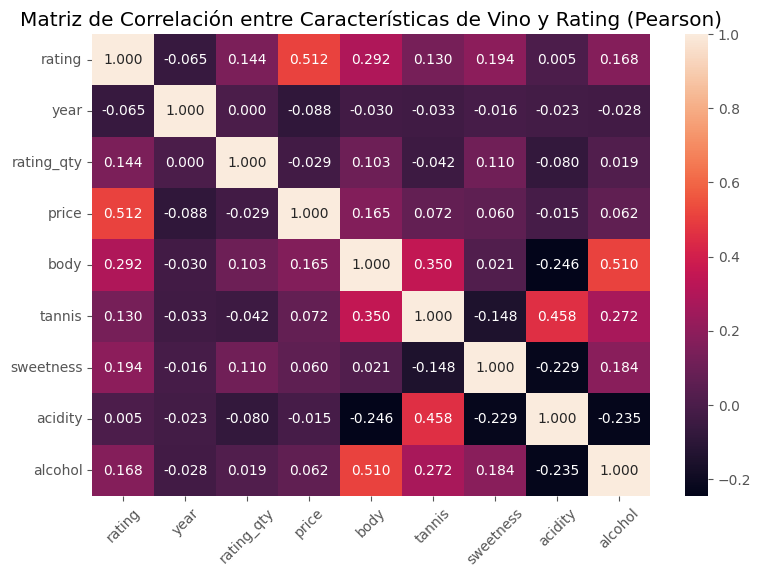

Correlación con rating:
rating        1.000000
price         0.511772
body          0.292035
sweetness     0.193857
alcohol       0.167849
rating_qty    0.143818
tannis        0.129703
acidity       0.005483
year         -0.064924
Name: rating, dtype: float64


In [ ]:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

# Correlación de pearson con rating:
wine_features = ["rating", "year", "rating_qty", "price", "body", "tannins", "sweetness", "acidity", "alcohol"]

corr_features = wines[wine_features].corr()

sns.heatmap(corr_features, annot=True, fmt=".3f")
plt.title("Matriz de Correlación entre Características de Vino y Rating (Pearson)")
plt.xticks(rotation=45)
plt.show()

corr_rating_features = corr_features["rating"].sort_values(ascending=False)
print(f"Correlación con rating:\n{corr_rating_features}")

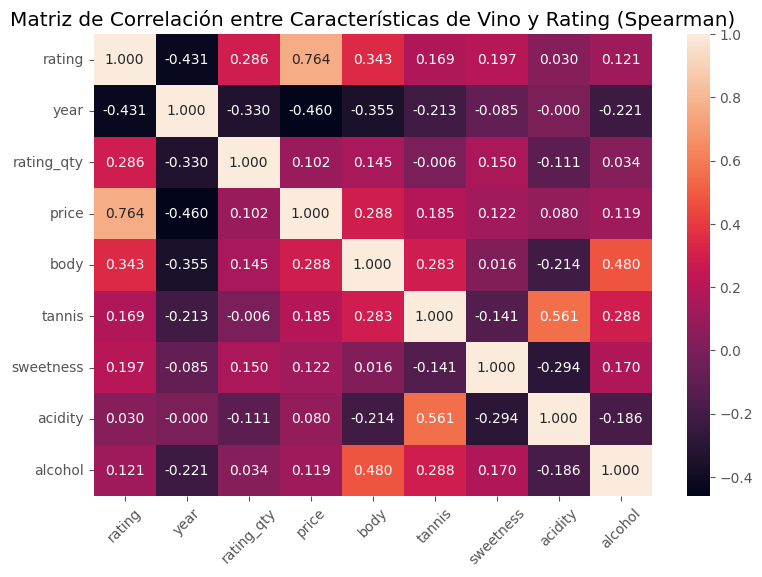

Correlación de Spearman con rating:
rating        1.000000
price         0.764331
body          0.342666
rating_qty    0.286181
sweetness     0.197238
tannis        0.169234
alcohol       0.120617
acidity       0.030335
year         -0.431385
Name: rating, dtype: float64


In [5]:
# Correlación de Spearman con rating:
corr_features_spear = wines[wine_features].corr(method="spearman")

sns.heatmap(corr_features_spear, annot=True, fmt=".3f")
plt.title("Matriz de Correlación entre Características de Vino y Rating (Spearman)")
plt.xticks(rotation=45)
plt.show()

corr_rating_features_spr = corr_features_spear["rating"].sort_values(ascending=False)
print(f"Correlación de Spearman con rating:\n{corr_rating_features_spr}")

In [6]:
# Comparación de correlaciones con variables
corr_rating_features_comp = corr_rating_features.to_frame().join(corr_rating_features_spr.to_frame(), lsuffix="_pearson", rsuffix="_spearman")
corr_rating_features_comp["diff"] = corr_rating_features_comp["rating_spearman"] - corr_rating_features_comp["rating_pearson"]
corr_rating_features_comp

,rating_pearson,rating_spearman,diff
rating,1.000000,1.000000,0.000000
price,0.511772,0.764331,0.252559
body,0.292035,0.342666,0.050631
sweetness,0.193857,0.197238,0.003381
alcohol,0.167849,0.120617,-0.047231
rating_qty,0.143818,0.286181,0.142363
tannis,0.129703,0.169234,0.039531
acidity,0.005483,0.030335,0.024852
year,-0.064924,-0.431385,-0.366461


**Grapes**

Rating Main Correlations

> - Rating Correlaciones +: no es tan notable, pero las correlaciones lineales que más detacan son con uvas Petit Verdot, Malbec, Cavernet Franc y Merlot.

> - Rating Correlaciones -: el que más detaca es el Torrontés, pero fuera de eso la uva tampoco parece determinar tan fuertemente en que medida el vino será considerado de alta calidad (rating).

> - Spearman: no genera variaciones significativas en la correlación de rating y vinos.

Otras variables

> - Luego, se ven algunas combinaciones de uvas, como Merlot + Cavernet Sauvignon o Franc y algunas otras que claramente no van juntas, como Malbec y Chardonay.

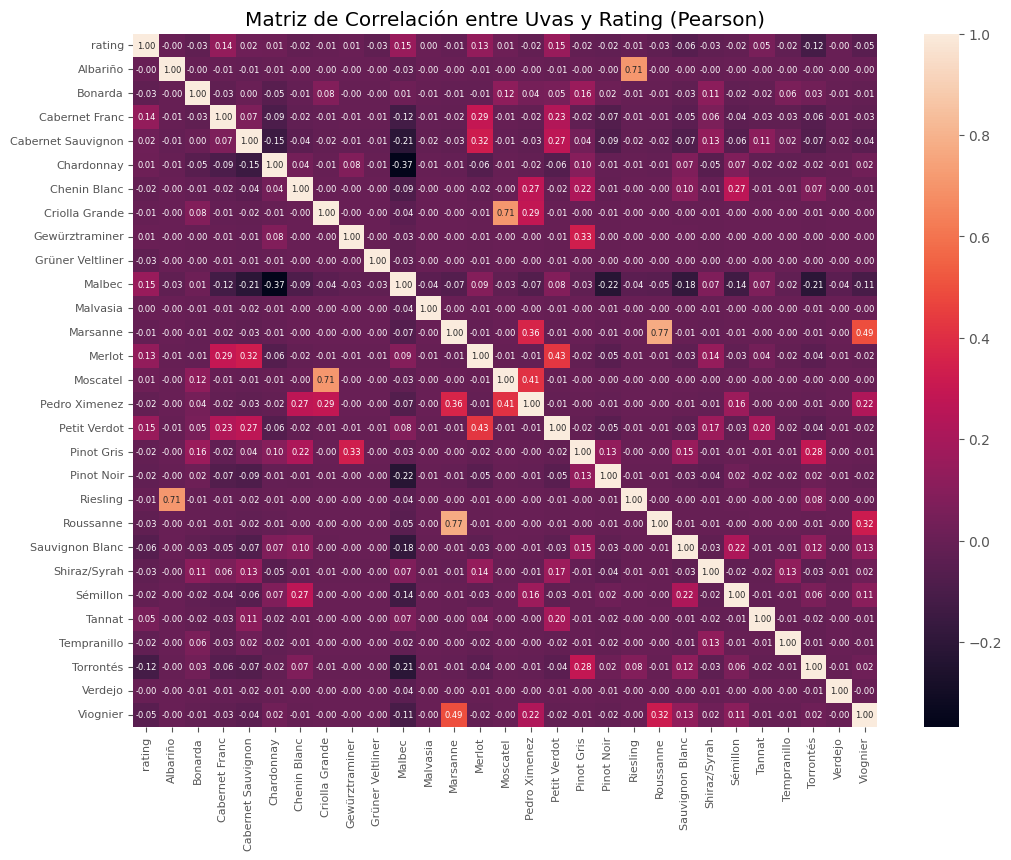

Correlación de Pearson con rating:
rating                1.000000
Petit Verdot          0.151663
Malbec                0.151201
Cabernet Franc        0.137745
Merlot                0.132156
Tannat                0.049689
Cabernet Sauvignon    0.019449
Moscatel              0.014927
Chardonnay            0.013892
Gewürztraminer        0.006888
Malvasia              0.004057
Albariño             -0.001151
Verdejo              -0.001629
Criolla Grande       -0.007315
Riesling             -0.007315
Marsanne             -0.013374
Pedro Ximenez        -0.015969
Sémillon             -0.018881
Chenin Blanc         -0.019573
Pinot Gris           -0.019573
Tempranillo          -0.022619
Pinot Noir           -0.024214
Roussanne            -0.025215
Grüner Veltliner     -0.025270
Shiraz/Syrah         -0.026575
Bonarda              -0.026787
Viognier             -0.048897
Sauvignon Blanc      -0.059834
Torrontés            -0.117646
Name: rating, dtype: float64


In [7]:
grapes = pd.read_csv("../../src/data/processed/aux/grapes.csv")
grapes = grapes["grapes"].to_list()
grapes.insert(0,"rating")
corr_grapes = wines[grapes].corr()

# Elimino columnas sin correlación (NaN)
condition = wines[grapes].sum() > 0
grape_cols = np.where(condition,corr_grapes.index,"nan")
no_nan_mask = grape_cols != "nan"
grape_no_nan = grape_cols[no_nan_mask]
grape_no_nan

corr_grapes_no_nan = wines[grape_no_nan].corr()
plt.figure(figsize=(12,9))
sns.heatmap(corr_grapes_no_nan, annot=True, fmt=".2f", annot_kws={"size":6})
plt.title("Matriz de Correlación entre Uvas y Rating (Pearson)")
plt.yticks(ticks=np.arange(0.5, len(corr_grapes_no_nan.index)), labels=corr_grapes_no_nan.index, fontsize=8)
plt.xticks(fontsize=8)
plt.show()

corr_grapes_rating = corr_grapes_no_nan["rating"].sort_values(ascending=False)
print(f"Correlación de Pearson con rating:\n{corr_grapes_rating}")

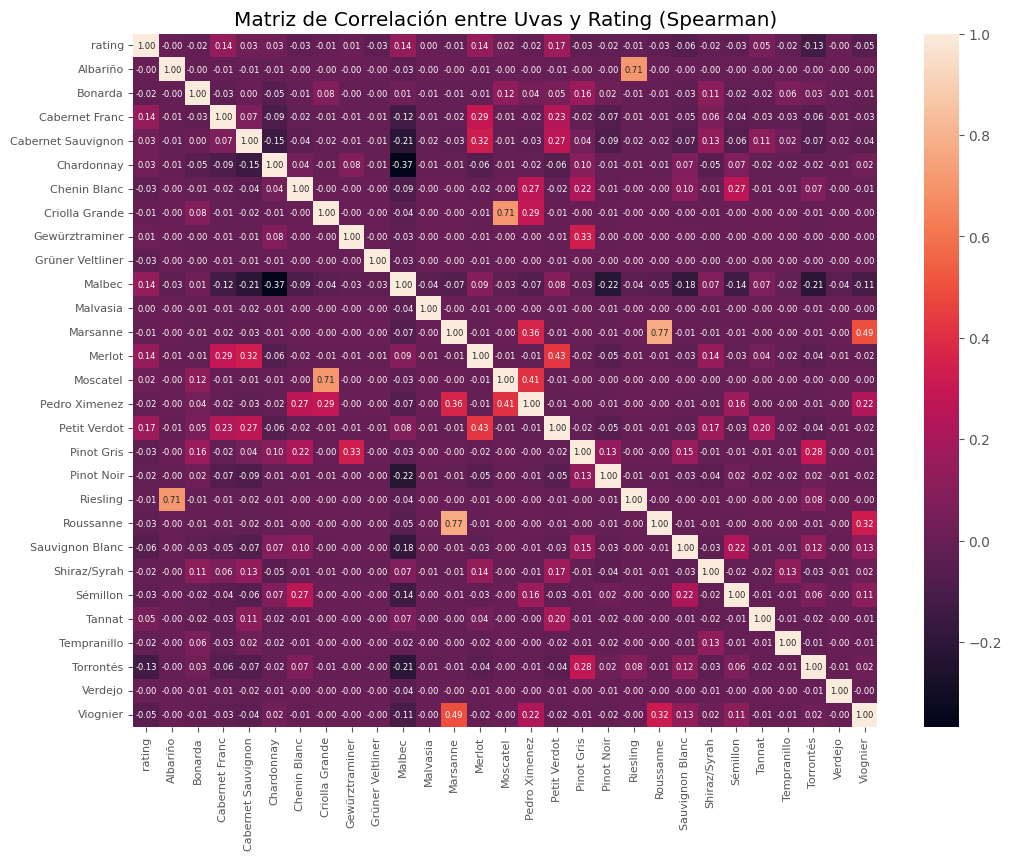

Correlación de Spearman con rating:
rating                1.000000
Petit Verdot          0.165365
Merlot                0.142222
Cabernet Franc        0.141876
Malbec                0.136572
Tannat                0.052440
Chardonnay            0.028141
Cabernet Sauvignon    0.027258
Moscatel              0.019519
Gewürztraminer        0.009850
Malvasia              0.003897
Albariño             -0.001595
Verdejo              -0.002941
Criolla Grande       -0.007195
Riesling             -0.011036
Marsanne             -0.013355
Shiraz/Syrah         -0.015750
Pedro Ximenez        -0.018086
Bonarda              -0.019496
Tempranillo          -0.019914
Pinot Noir           -0.021138
Chenin Blanc         -0.026045
Sémillon             -0.027152
Roussanne            -0.028613
Pinot Gris           -0.029213
Grüner Veltliner     -0.029692
Viognier             -0.050781
Sauvignon Blanc      -0.058732
Torrontés            -0.125969
Name: rating, dtype: float64


In [8]:
corr_grapes_no_nan_spear = wines[grape_no_nan].corr(method="spearman")
plt.figure(figsize=(12,9))
sns.heatmap(corr_grapes_no_nan_spear, annot=True, fmt=".2f", annot_kws={"size":6})
plt.title("Matriz de Correlación entre Uvas y Rating (Spearman)")
plt.yticks(ticks=np.arange(0.5, len(corr_grapes_no_nan_spear.index)), labels=corr_grapes_no_nan_spear.index, fontsize=8)
plt.xticks(fontsize=8)
plt.show()

corr_grapes_rating_spr = corr_grapes_no_nan_spear["rating"].sort_values(ascending=False)
print(f"Correlación de Spearman con rating:\n{corr_grapes_rating_spr}")

In [9]:
corr_grapes_rating_comp = corr_grapes_rating.to_frame().join(corr_grapes_rating_spr.to_frame(), lsuffix="_pearson", rsuffix="_spearman")
corr_grapes_rating_comp["diff"] = corr_grapes_rating_comp["rating_spearman"] - corr_grapes_rating_comp["rating_pearson"]
corr_grapes_rating_comp

,rating_pearson,rating_spearman,diff
rating,1.000000,1.000000,0.000000
Petit Verdot,0.151663,0.165365,0.013702
Malbec,0.151201,0.136572,-0.014629
Cabernet Franc,0.137745,0.141876,0.004131
Merlot,0.132156,0.142222,0.010066
Tannat,0.049689,0.052440,0.002751
Cabernet Sauvignon,0.019449,0.027258,0.007810
Moscatel,0.014927,0.019519,0.004591
Chardonnay,0.013892,0.028141,0.014249
Gewürztraminer,0.006888,0.009850,0.002962


**Notes**

Rating Main Correlations

> - Rating Correlación +: vemos una mayor correlación lineal positiva con las notas amaderadas (vinos conserva).

> - Rating Correlación -: se nota una correlación lineal negativa entre el rating y notas de frutos rojos y cítricas.

> - Spearman: varian un poco los valores, pero sobre todo es notable el fuerte incremento de correlación con notas florales y de fruta seca.

Otras variables

> - Grupos de sabores: es notable como ciertos sabores van de la mano o son contrarios. Esto indica que se podrían formar grupos de sabores que caractericen los vinos, más que notas individuales.

> - Cítricos y Frutales vs Amaderados y Tradicionales

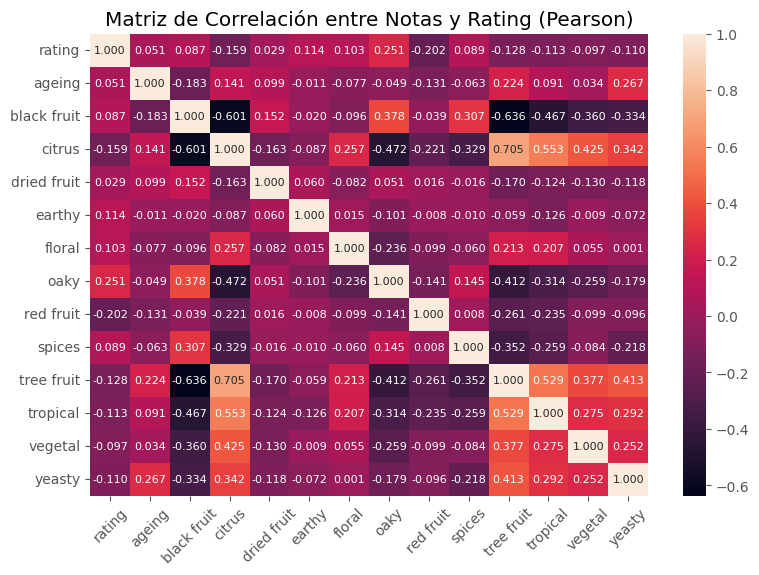

Correlación de Pearson con rating:
rating         1.000000
oaky           0.251047
earthy         0.114037
floral         0.102828
spices         0.089443
black fruit    0.086946
ageing         0.050540
dried fruit    0.029036
vegetal       -0.096512
yeasty        -0.110117
tropical      -0.113256
tree fruit    -0.127808
citrus        -0.158543
red fruit     -0.202485
Name: rating, dtype: float64


In [10]:
notes = pd.read_csv("../../src/data/processed/aux/notes.csv")
notes = notes["notes"].to_list()
notes.insert(0,"rating")
corr_notes = wines[notes].corr()
sns.heatmap(corr_notes, annot=True, fmt=".3f", annot_kws={"size":8})
plt.title("Matriz de Correlación entre Notas y Rating (Pearson)")
plt.xticks(rotation=45)
plt.show()

corr_notes_rating = corr_notes["rating"].sort_values(ascending=False)
print(f"Correlación de Pearson con rating:\n{corr_notes_rating}")

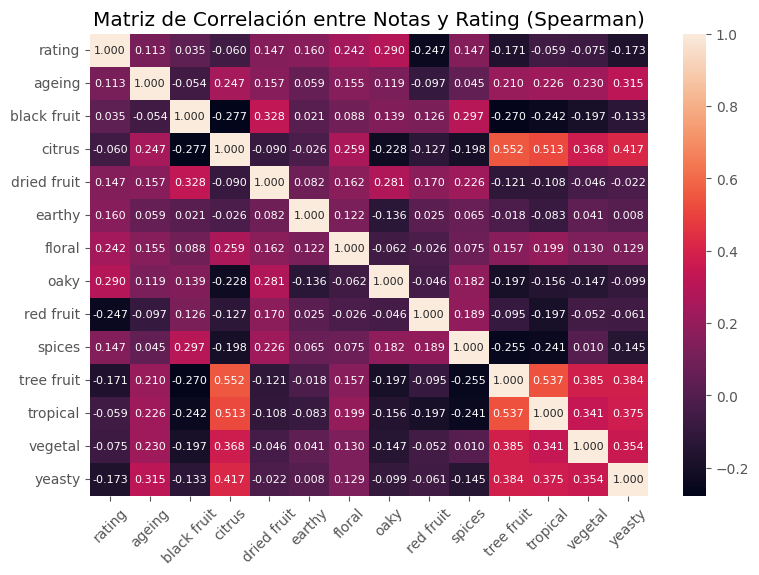

Correlación de Spearman con rating:
rating         1.000000
oaky           0.289829
floral         0.242339
earthy         0.159811
dried fruit    0.146974
spices         0.146932
ageing         0.112755
black fruit    0.035086
tropical      -0.058890
citrus        -0.059896
vegetal       -0.074789
tree fruit    -0.171037
yeasty        -0.172726
red fruit     -0.246677
Name: rating, dtype: float64


In [11]:
corr_notes_spear = wines[notes].corr(method="spearman")
sns.heatmap(corr_notes_spear, annot=True, fmt=".3f", annot_kws={"size":8})
plt.title("Matriz de Correlación entre Notas y Rating (Spearman)")
plt.xticks(rotation=45)
plt.show()

corr_notes_rating_spr = corr_notes_spear["rating"].sort_values(ascending=False)
print(f"Correlación de Spearman con rating:\n{corr_notes_rating_spr}")

In [12]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html
corr_notes_rating_comp = corr_notes_rating.to_frame().join(corr_notes_rating_spr.to_frame(), lsuffix="_pearson", rsuffix="_spearman")
corr_notes_rating_comp["diff"] = corr_notes_rating_comp["rating_spearman"] - corr_notes_rating_comp["rating_pearson"]
corr_notes_rating_comp

,rating_pearson,rating_spearman,diff
rating,1.000000,1.000000,0.000000
oaky,0.251047,0.289829,0.038781
earthy,0.114037,0.159811,0.045775
floral,0.102828,0.242339,0.139511
spices,0.089443,0.146932,0.057489
black fruit,0.086946,0.035086,-0.051860
ageing,0.050540,0.112755,0.062216
dried fruit,0.029036,0.146974,0.117938
vegetal,-0.096512,-0.074789,0.021723
yeasty,-0.110117,-0.172726,-0.062609


**Pairings**

Rating Main Correlations

> - Rating Correlación +: parece ser que los mejores vinos son aquellos que mejor combinan con pasta, carne de vaca y cordero.

> - Rating Correlación -: por su parte, los vinos con peor recomendación van de la mano con comida chatarra, aperitivos y snacks.

> - Spearman: no muestra cambios significativos.

Otras variables

> - Grupos de Maridajes: hay maridajes que también van de la mano, por lo que se podrían clusterizar y utilizar para categorizar vinos (similar a la sección anterior).

> - Apertivos + Snacks vs Queso + Pescado son algunos de los que más destacan.

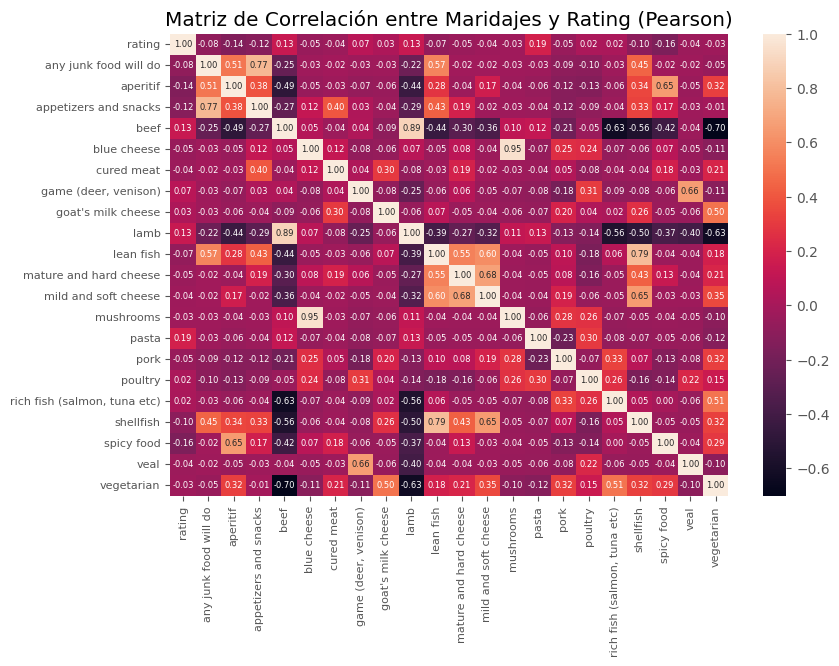

Correlación de Pearson con rating:
rating                          1.000000
pasta                           0.185528
beef                            0.130419
lamb                            0.129972
game (deer, venison)            0.073320
goat's milk cheese              0.025195
poultry                         0.018652
rich fish (salmon, tuna etc)    0.015323
mushrooms                      -0.025030
vegetarian                     -0.034413
mild and soft cheese           -0.035881
cured meat                     -0.038767
veal                           -0.040957
mature and hard cheese         -0.048541
blue cheese                    -0.050580
pork                           -0.051559
lean fish                      -0.073304
any junk food will do          -0.083262
shellfish                      -0.096444
appetizers and snacks          -0.121635
aperitif                       -0.142794
spicy food                     -0.157465
Name: rating, dtype: float64


In [13]:
pairings = pd.read_csv("../../src/data/processed/aux/pairings.csv")
pairings = pairings["pairings"].to_list()
pairings.insert(0, "rating")
corr_pairings = wines[pairings].corr()
sns.heatmap(corr_pairings, annot=True, fmt=".2f", annot_kws={"size":6})
plt.title("Matriz de Correlación entre Maridajes y Rating (Pearson)")
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
plt.show()

corr_pairings_rating = corr_pairings["rating"].sort_values(ascending=False)
print(f"Correlación de Pearson con rating:\n{corr_pairings_rating}")

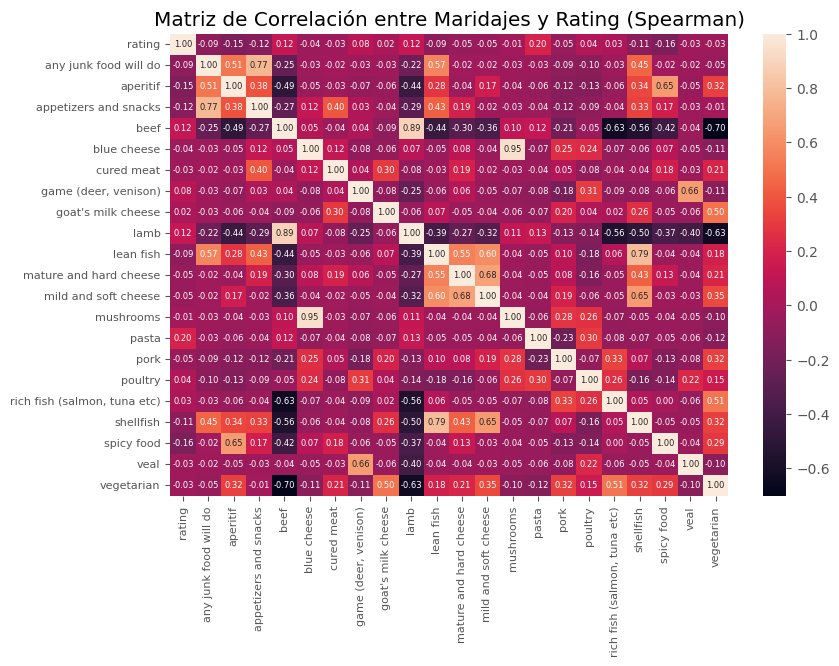

Correlación de Spearman con rating:
rating                          1.000000
pasta                           0.197765
beef                            0.122897
lamb                            0.119951
game (deer, venison)            0.079972
poultry                         0.043532
rich fish (salmon, tuna etc)    0.028445
goat's milk cheese              0.022192
mushrooms                      -0.013415
veal                           -0.026849
cured meat                     -0.029534
vegetarian                     -0.030298
blue cheese                    -0.036518
mild and soft cheese           -0.046644
mature and hard cheese         -0.050481
pork                           -0.051276
lean fish                      -0.086917
any junk food will do          -0.090801
shellfish                      -0.106806
appetizers and snacks          -0.121251
aperitif                       -0.151803
spicy food                     -0.158248
Name: rating, dtype: float64


In [14]:
corr_pairings_spear = wines[pairings].corr(method="spearman")
sns.heatmap(corr_pairings_spear, annot=True, fmt=".2f", annot_kws={"size":6})
plt.title("Matriz de Correlación entre Maridajes y Rating (Spearman)")
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
plt.show()


corr_pairings_rating_spr = corr_pairings_spear["rating"].sort_values(ascending=False)
print(f"Correlación de Spearman con rating:\n{corr_pairings_rating_spr}")

In [15]:
corr_pairings_rating_comp = corr_pairings_rating.to_frame().join(corr_pairings_rating_spr.to_frame(), lsuffix="_pearson", rsuffix="_spearman")
corr_pairings_rating_comp["diff"] = corr_pairings_rating_comp["rating_spearman"] - corr_pairings_rating_comp["rating_pearson"]
corr_pairings_rating_comp

,rating_pearson,rating_spearman,diff
rating,1.000000,1.000000,0.000000
pasta,0.185528,0.197765,0.012237
beef,0.130419,0.122897,-0.007522
lamb,0.129972,0.119951,-0.010020
"game (deer, venison)",0.073320,0.079972,0.006652
goat's milk cheese,0.025195,0.022192,-0.003003
poultry,0.018652,0.043532,0.024880
"rich fish (salmon, tuna etc)",0.015323,0.028445,0.013122
mushrooms,-0.025030,-0.013415,0.011616
vegetarian,-0.034413,-0.030298,0.004114


**Region**

Correlación de Región con Rating

> - No hay tanta correlación entre las regiones y el rating de un vino. Destacan un poco las regiones de Perdriel y Gualtallary.

> - Spearman: al utilizacr correlación de spearman, la relación de la región y el rating es aún más conservadora.

> - Conclusión: la región no parece determinar en gran medida la calidad de un vino a priori.

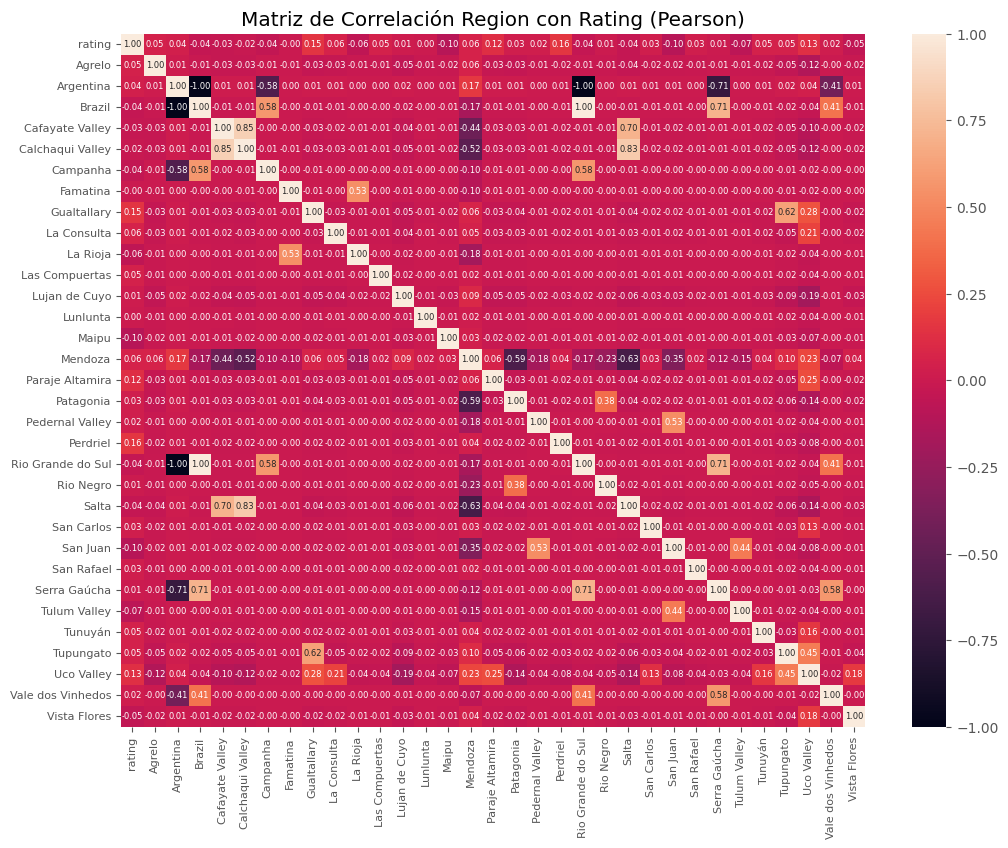

Correlación de pearson con rating:
rating               1.000000
Perdriel             0.161347
Gualtallary          0.149856
Uco Valley           0.125117
Paraje Altamira      0.117463
Mendoza              0.060217
La Consulta          0.059787
Las Compuertas       0.053043
Agrelo               0.050604
Tupungato            0.049871
Tunuyán              0.048394
Argentina            0.035687
Patagonia            0.030584
San Rafael           0.028060
San Carlos           0.025641
Pedernal Valley      0.024339
Vale dos Vinhedos    0.022967
Lujan de Cuyo        0.009260
Serra Gaúcha         0.007293
Rio Negro            0.005892
Lunlunta             0.004621
Famatina            -0.001629
Calchaqui Valley    -0.022907
Cafayate Valley     -0.030284
Salta               -0.035210
Rio Grande do Sul   -0.035687
Brazil              -0.035687
Campanha            -0.041432
Vista Flores        -0.049853
La Rioja            -0.060874
Tulum Valley        -0.074558
Maipu               -0.095836
San J

In [16]:
region = pd.read_csv("../../src/data/processed/aux/region.csv")
region = region["region"].to_list()
region.insert(0,"rating")
corr_region = wines[region].corr()
plt.figure(figsize=(12,9))
sns.heatmap(corr_region, annot=True, fmt=".2f", annot_kws={"size":6})
plt.title("Matriz de Correlación Region con Rating (Pearson)")
plt.yticks(ticks=np.arange(0.5, len(corr_region.index)), labels=corr_region.index, fontsize=8)
plt.xticks(fontsize=8)
plt.show()

corr_region_rating = corr_region["rating"].sort_values(ascending=False)
print(f"Correlación de pearson con rating:\n{corr_region_rating}")

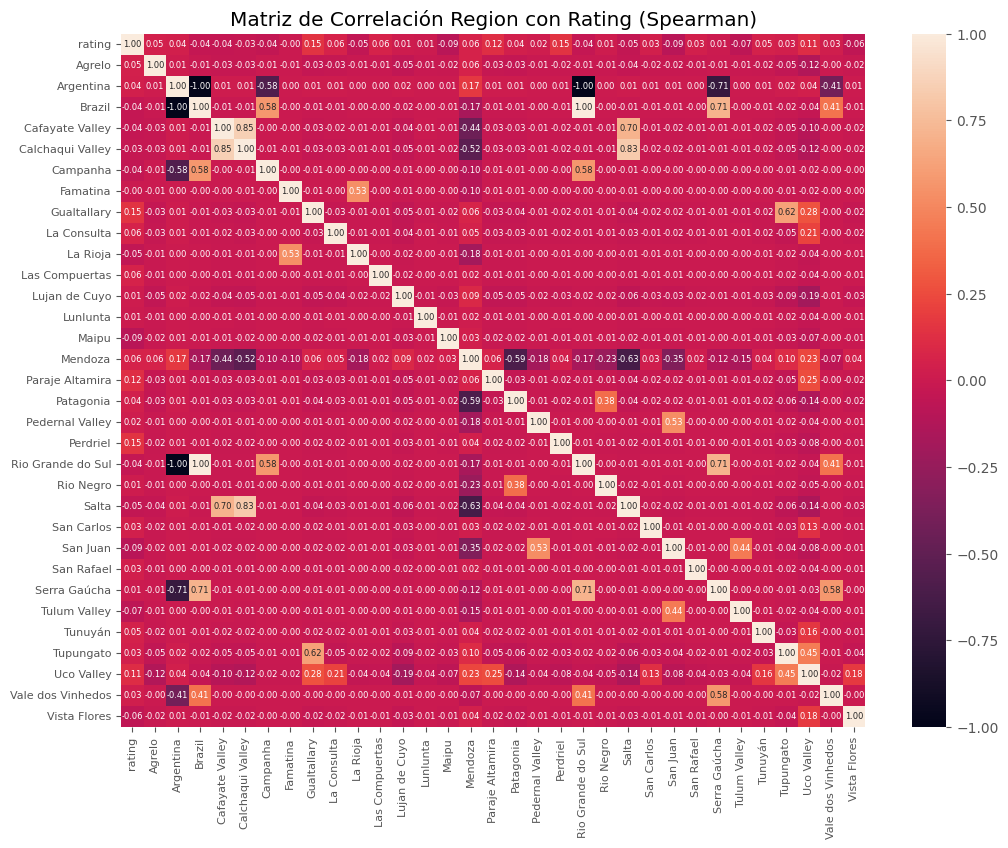

Correlación de Spearman con rating:
rating               1.000000
Perdriel             0.146316
Gualtallary          0.145744
Paraje Altamira      0.118703
Uco Valley           0.110095
Las Compuertas       0.061404
Mendoza              0.060556
La Consulta          0.060482
Tunuyán              0.046877
Agrelo               0.046249
Patagonia            0.035890
Argentina            0.035355
Tupungato            0.033456
San Rafael           0.032865
San Carlos           0.032086
Vale dos Vinhedos    0.026745
Pedernal Valley      0.022640
Lujan de Cuyo        0.009579
Rio Negro            0.009287
Serra Gaúcha         0.007229
Lunlunta             0.005449
Famatina            -0.003226
Calchaqui Valley    -0.027536
Brazil              -0.035355
Rio Grande do Sul   -0.035355
Cafayate Valley     -0.036444
Campanha            -0.044657
Salta               -0.046537
La Rioja            -0.054227
Vista Flores        -0.057049
Tulum Valley        -0.066931
Maipu               -0.089610
San 

In [17]:
corr_region_spear = wines[region].corr(method="spearman")
plt.figure(figsize=(12,9))
sns.heatmap(corr_region_spear, annot=True, fmt=".2f", annot_kws={"size":6})
plt.title("Matriz de Correlación Region con Rating (Spearman)")
plt.yticks(ticks=np.arange(0.5, len(corr_region_spear.index)), labels=corr_region_spear.index, fontsize=8)
plt.xticks(fontsize=8)
plt.show()

corr_region_rating_spr = corr_region_spear["rating"].sort_values(ascending=False)
print(f"Correlación de Spearman con rating:\n{corr_region_rating_spr}")

In [18]:
corr_region_rating_comp = corr_region_rating.to_frame().join(corr_region_rating_spr.to_frame(), lsuffix="_pearson", rsuffix="_spearman")
corr_region_rating_comp["diff"] = corr_region_rating_comp["rating_spearman"] - corr_region_rating_comp["rating_pearson"]
corr_region_rating_comp

,rating_pearson,rating_spearman,diff
rating,1.000000,1.000000,0.000000
Perdriel,0.161347,0.146316,-0.015031
Gualtallary,0.149856,0.145744,-0.004112
Uco Valley,0.125117,0.110095,-0.015022
Paraje Altamira,0.117463,0.118703,0.001239
Mendoza,0.060217,0.060556,0.000339
La Consulta,0.059787,0.060482,0.000695
Las Compuertas,0.053043,0.061404,0.008360
Agrelo,0.050604,0.046249,-0.004356
Tupungato,0.049871,0.033456,-0.016415


## 02 | Co-Ocurrencia de Variables y Perfil de Sabor Vs Rating

Ideas Pendientes: Perfil de maridaje y rating - Maridajes que van de la mano y como van con el rating

[Ideas con ChatGPT](https://chatgpt.com/share/6813f373-84b0-8009-a4c3-9f1dab145013)

---

### Co-Ocurrencia de Valirables

El objetivo de este apartado es ver la ocurrencia conjunta o contraria, mezclando las siguientes variables:

<br>

| Grapes | Pairings | Notes | Region |
|--------|----------|-------|--------|

<br>

De esta forma, se obtienen las combinaciones:
1. Pairings y Uvas
2. Pairings y Sabores
3. Pairings y Notas
4. Uvas y Sabores
5. Uvas y Notas
6. Sabores y Notas

---

__Maridajes y Uvas__

Uvas por grupos de maridajes

> - Aperitivos: en general matchean con uvas Torrontés, Chardonay y Pinot Noire.

> - Quesos y Carnes: matchean principalmente con Malbec y Cavernet Sauvignon o Franc.

> - Pescados y Mariscos: van bien sobre todo con Chardonnay.

> - Vegetales y Hongos: pegan con Malbec, Chardonnay y Cavernet Franc.

> - Pasta: es más versatil y puede ir con Malbec, algún Cavernet, Merlot o Petit Verdot.

> - Embutidos: destaca Cavernet Franc y Malbec.

> - Comida Picante: va muy bien con Torrontés.

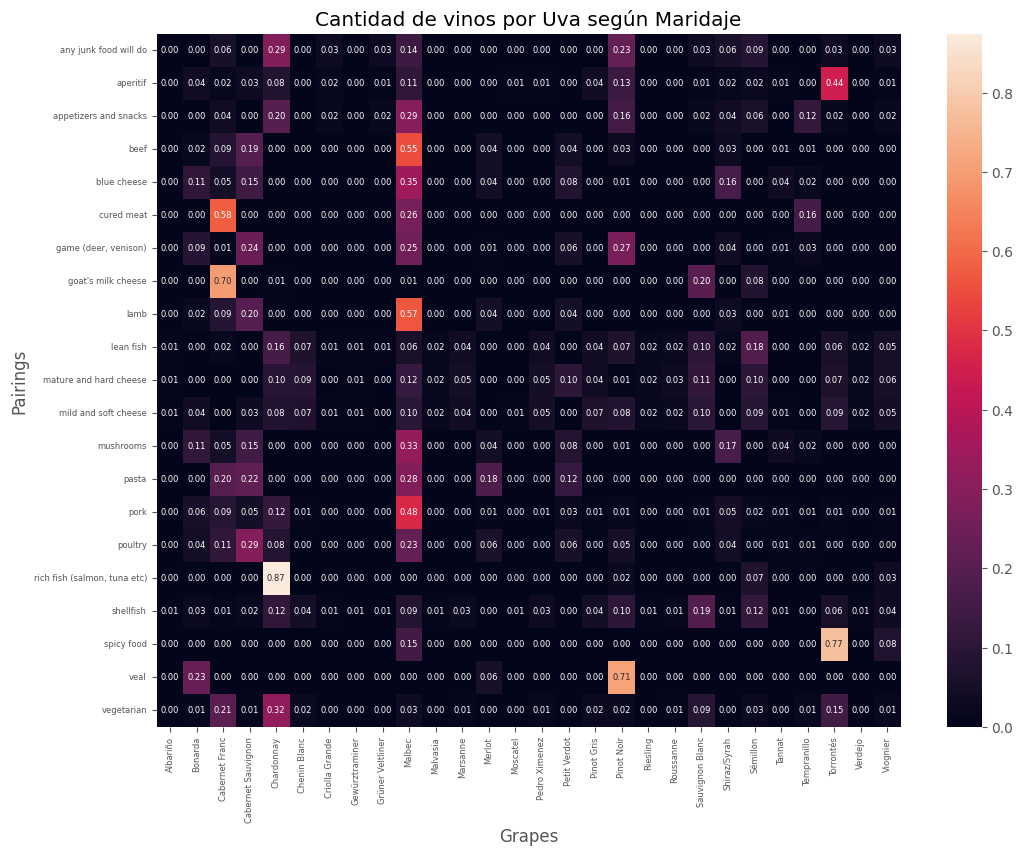

In [19]:
# Stacked Bar Chart -> Al final decidí usar un heatmap: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
# Loc: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html
# Div: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.div.html#pandas.DataFrame.div
pairings = pd.read_csv("../../src/data/processed/aux/pairings.csv")
pairings = pairings["pairings"].to_list()
grapes = pd.read_csv("../../src/data/processed/aux/grapes.csv")
grapes = grapes["grapes"].to_list()

pairing_grape_count = pd.DataFrame(0, index=pairings, columns=grapes)

for pairing in pairings:
    wines_with_pairing = wines[wines[pairing]==1]
    wines_by_grape = wines_with_pairing[grapes].sum()
    pairing_grape_count.loc[pairing] = wines_by_grape

wines_by_grape = pairing_grape_count.sum() 

grapes_with_no_wines = wines_by_grape.index[wines_by_grape==0]

pairing_grape_count = pairing_grape_count.drop(columns=grapes_with_no_wines, axis=0)
pairing_grape_porc = pairing_grape_count.div(pairing_grape_count.sum(axis=1), axis=0)
plt.figure(figsize=(12,9))
sns.heatmap(pairing_grape_porc, annot=True, fmt=".2f", annot_kws={"size": 6})
plt.title("Cantidad de vinos por Uva según Maridaje")
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.ylabel("Pairings")
plt.xlabel("Grapes")
plt.show()

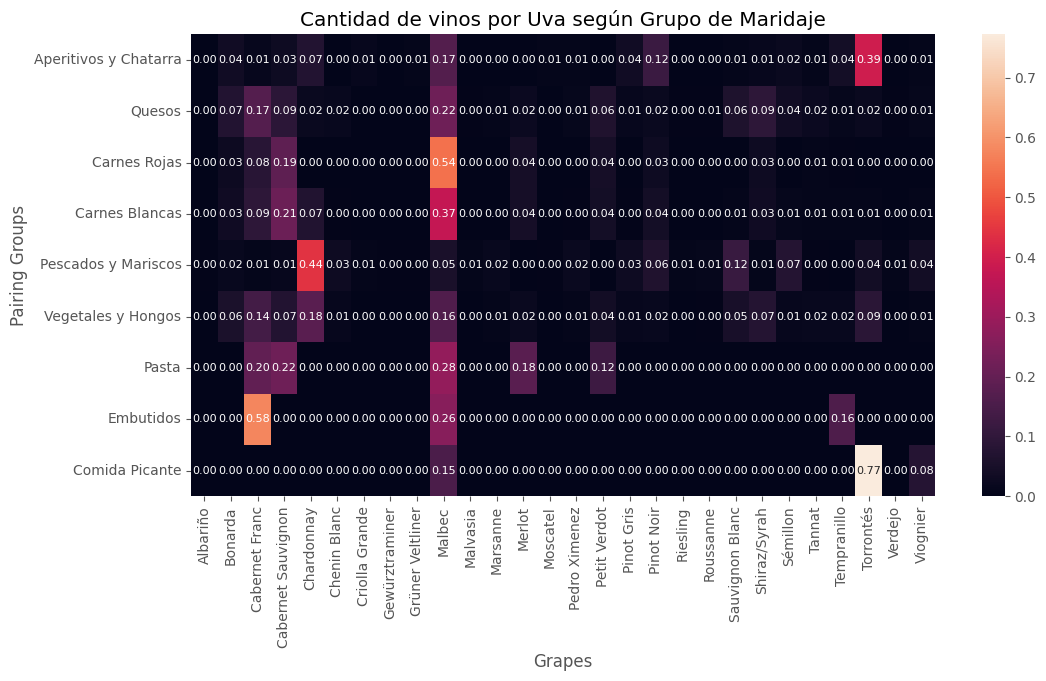

In [20]:
# Dictionary .items(): https://www.w3schools.com/python/ref_dictionary_items.asp
# Pandas .any(): https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.any.html
pairing_groups = {
    "Aperitivos y Chatarra": [
        "any junk food will do",
        "aperitif",
        "appetizers and snacks"
    ],
    "Quesos": [
        "blue cheese",
        "goat's milk cheese",
        "mature and hard cheese",
        "mild and soft cheese"
    ],
    "Carnes Rojas": [
        "beef",
        "lamb",
        "veal",
        "game (deer, venison)"
    ],
    "Carnes Blancas": [
        "pork",
        "poultry"
    ],
    "Pescados y Mariscos": [
        "lean fish",
        "rich fish (salmon, tuna etc)",
        "shellfish"
    ],
    "Vegetales y Hongos": [
        "mushrooms",
        "vegetarian"
    ],
    "Pasta": [
        "pasta"
    ],
    "Embutidos": [
        "cured meat"
    ],
    "Comida Picante": [
        "spicy food"
    ]
}

grouped_pairing_grape_count = pd.DataFrame(0, index=list(pairing_groups.keys()), columns=grapes)

for pairing_group, columns in pairing_groups.items():
    wine_in_group = wines[wines[columns].any(axis=1) == 1]
    wines_by_group = wine_in_group[grapes].sum()
    grouped_pairing_grape_count.loc[pairing_group] = wines_by_group

wines_by_grape = grouped_pairing_grape_count[grapes].sum()

grapes_with_no_wines = wines_by_grape.index[wines_by_grape==0]

grouped_pairing_grape_count = grouped_pairing_grape_count.drop(columns=grapes_with_no_wines)
grouped_pairing_grape_perc = grouped_pairing_grape_count.div(grouped_pairing_grape_count.sum(axis=1),axis=0)
plt.figure(figsize=(12,6))
sns.heatmap(grouped_pairing_grape_perc, annot=True, fmt=".2f", annot_kws={"size":8})
plt.title("Cantidad de vinos por Uva según Grupo de Maridaje")
plt.ylabel("Pairing Groups")
plt.xlabel("Grapes")
plt.show()

__Maridajes y Sabores__

*Se escalaron los sabores (tastes) para poder compararlos sobre la misma escala.*

> - En el caso de sabores, si bien se muestra cierta similitud entre grupo de maridaje (Pairing Group), cada maridaje tiene sus características particulares notablemente.

> - Body: destacan en la pasta sobre todo y carnes. También en Hongos y vegetales.

> - Taninos: principal presencia en pastas, embutidos y quesos.

> - Dulzor: tiene un valor más reducido, pero destaca en la categoría de Quesos y la de Vegetales por el queso azul y los hongos.

> - Acidez: tiene un valor más elevado en todas los grupos de maridaje, pero destacan aperitivos y comida chatarra, quesos y pasta.

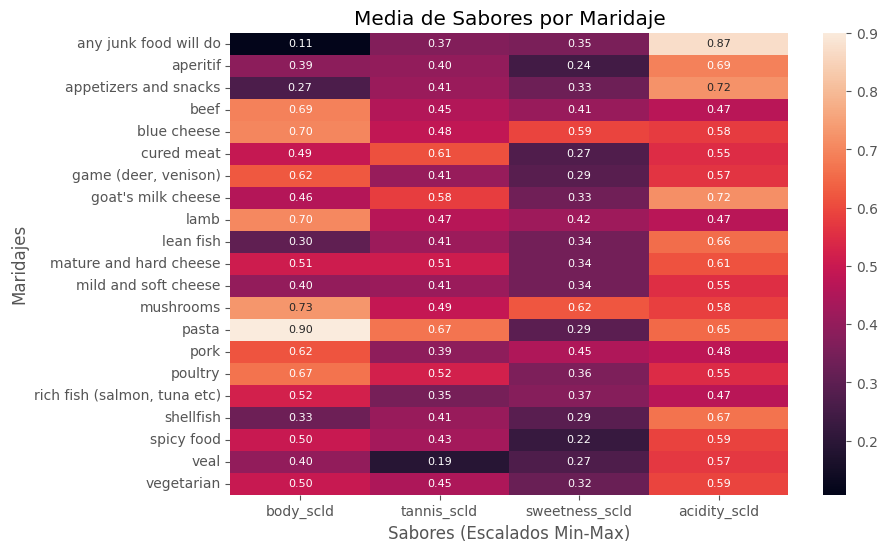

In [ ]:
# MinMaxScaler(): https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

tastes_dict = {
    "body": "body_scld",
    "tannins": "tannins_scld",
    "sweetness": "sweetness_scld",
    "acidity": "acidity_scld"
}

tastes_plain = list(tastes_dict.keys())
tastes_scld = list(tastes_dict.values())

pairings = pd.read_csv("../../src/data/processed/aux/pairings.csv")
pairings = pairings["pairings"].to_list()

mean_taste_by_pairing = pd.DataFrame(0, index=pairings, columns=tastes_scld)
mean_taste_by_pairing[tastes_scld] = mean_taste_by_pairing[tastes_scld].astype(float)

scaler = MinMaxScaler()
columns_for_scaling = tastes_plain + pairings
scaled_wines = wines[columns_for_scaling].copy()

scaled_wines[tastes_scld] = scaler.fit_transform(scaled_wines[tastes_plain])

for pairing in pairings:
    wines_with_pairing = scaled_wines[scaled_wines[pairing]==1]
    mean_pairing_tastes = wines_with_pairing[tastes_scld].mean()
    mean_taste_by_pairing.loc[pairing] = mean_pairing_tastes

plt.title("Media de Sabores por Maridaje")
sns.heatmap(mean_taste_by_pairing, annot=True, fmt=".2f", annot_kws={"size": 8})
plt.ylabel("Maridajes")
plt.xlabel("Sabores (Escalados Min-Max)")
plt.show()

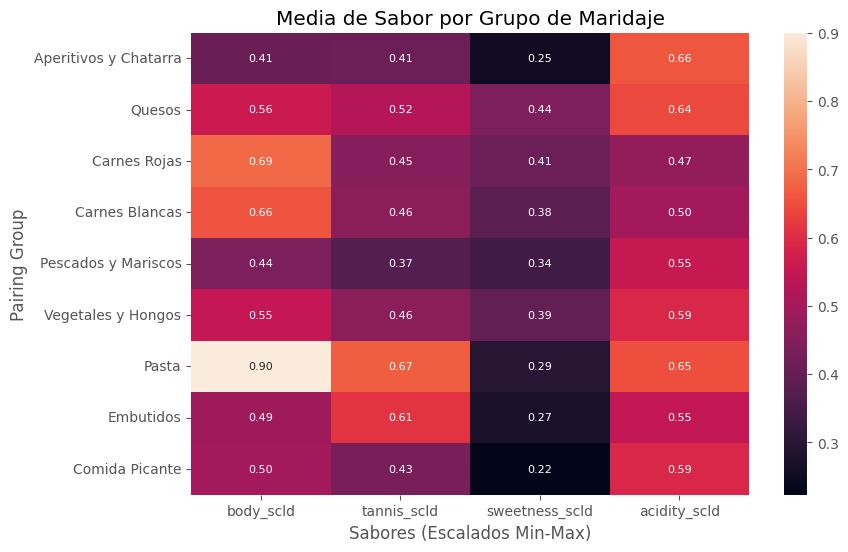

In [22]:
pairing_groups = {
    "Aperitivos y Chatarra": [
        "any junk food will do",
        "aperitif",
        "appetizers and snacks"
    ],
    "Quesos": [
        "blue cheese",
        "goat's milk cheese",
        "mature and hard cheese",
        "mild and soft cheese"
    ],
    "Carnes Rojas": [
        "beef",
        "lamb",
        "veal",
        "game (deer, venison)"
    ],
    "Carnes Blancas": [
        "pork",
        "poultry"
    ],
    "Pescados y Mariscos": [
        "lean fish",
        "rich fish (salmon, tuna etc)",
        "shellfish"
    ],
    "Vegetales y Hongos": [
        "mushrooms",
        "vegetarian"
    ],
    "Pasta": [
        "pasta"
    ],
    "Embutidos": [
        "cured meat"
    ],
    "Comida Picante": [
        "spicy food"
    ]
}

grouped_pairing_taste_count = pd.DataFrame(0, index=list(pairing_groups.keys()), columns=tastes_scld)
grouped_pairing_taste_count[tastes_scld] = grouped_pairing_taste_count[tastes_scld].astype(float)

for pairing_group, columns in pairing_groups.items():
    wine_in_group = scaled_wines[scaled_wines[columns].any(axis=1)==1]
    mean_taste_by_group = wine_in_group[tastes_scld].mean()
    grouped_pairing_taste_count.loc[pairing_group] = mean_taste_by_group


plt.title("Media de Sabor por Grupo de Maridaje")
sns.heatmap(grouped_pairing_taste_count, annot=True, fmt=".2f", annot_kws={"size": 8})
plt.ylabel("Pairing Group")
plt.xlabel("Sabores (Escalados Min-Max)")
plt.show()

__Maridajes y Notas__

Grupos de Maridajes

> - Aperitivos: destacan notas cítricas, frutos del bosque y rojos.

> - Quesos y Carnes: se notan notas amaderadas y de frutos negros.

> - Pescados y Mariscos: van con frutos del bosque, cítricos y en menor medida notas amaderadas.

> - Vegetales y Hongos: más parejo entre amaderadas, cítricas, frutos del bosque y frutos negros.

> - Pasta: muy relacionado con notas amaderadas y de frutos negros.

> - Embutidos: sobre todo relacionado con frutos rojos y notas amaderadas.

> - Comida Picante: va con notas cítricas, frutos del bosque y notas tropicales.

Notas

> - Earthy: parece que todos los maridajes tienen cierta cantidad de notas terrosas en promedio.

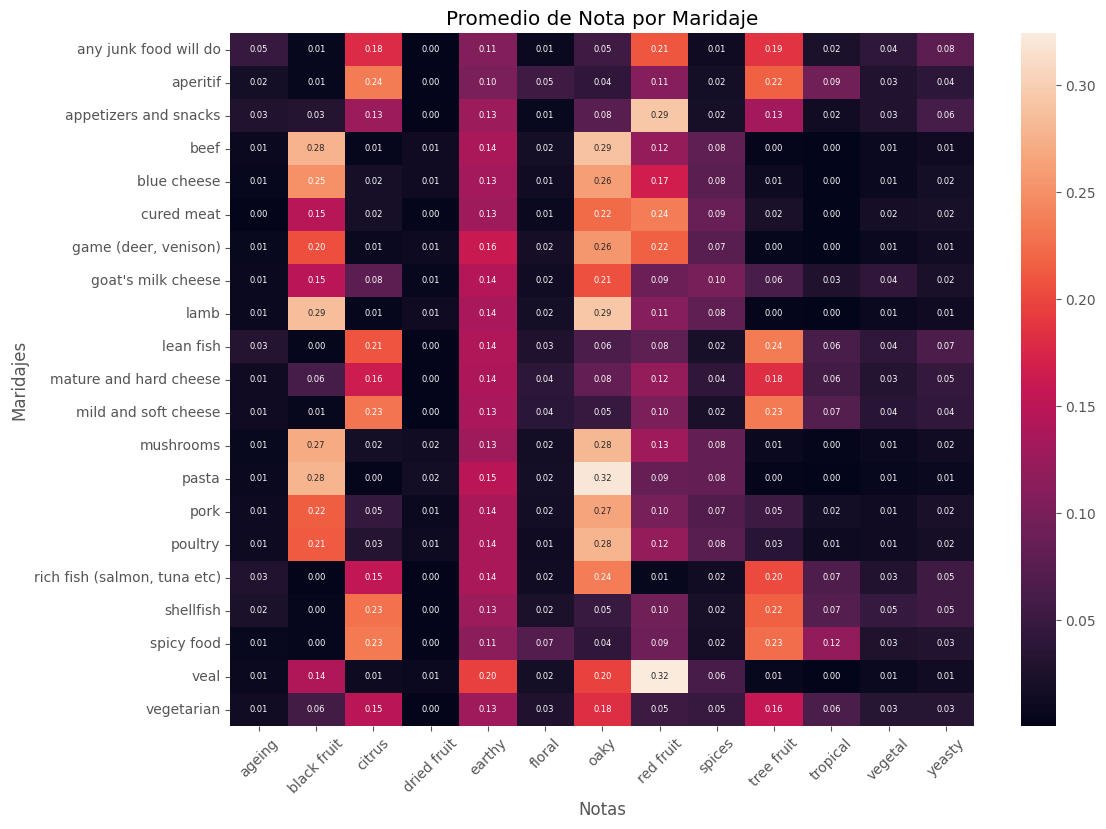

In [23]:
pairings = pd.read_csv("../../src/data/processed/aux/pairings.csv")
pairings = pairings["pairings"].to_list()

notes = pd.read_csv("../../src/data/processed/aux/notes.csv")
notes = notes["notes"].to_list()

mean_note_by_pairing = pd.DataFrame(0, index=pairings, columns=notes)
mean_note_by_pairing[notes] = mean_note_by_pairing[notes].astype(float)

for pairing in pairings:
    wine_with_pairing = wines[wines[pairing]==1]
    mean_by_note = wine_with_pairing[notes].mean()
    mean_note_by_pairing.loc[pairing] = mean_by_note

plt.figure(figsize=(12,9))
plt.title("Promedio de Nota por Maridaje")
sns.heatmap(mean_note_by_pairing, annot=True, fmt=".2f", annot_kws={"size": 6})
plt.ylabel("Maridajes")
plt.xlabel("Notas")
plt.xticks(rotation=45)
plt.show()

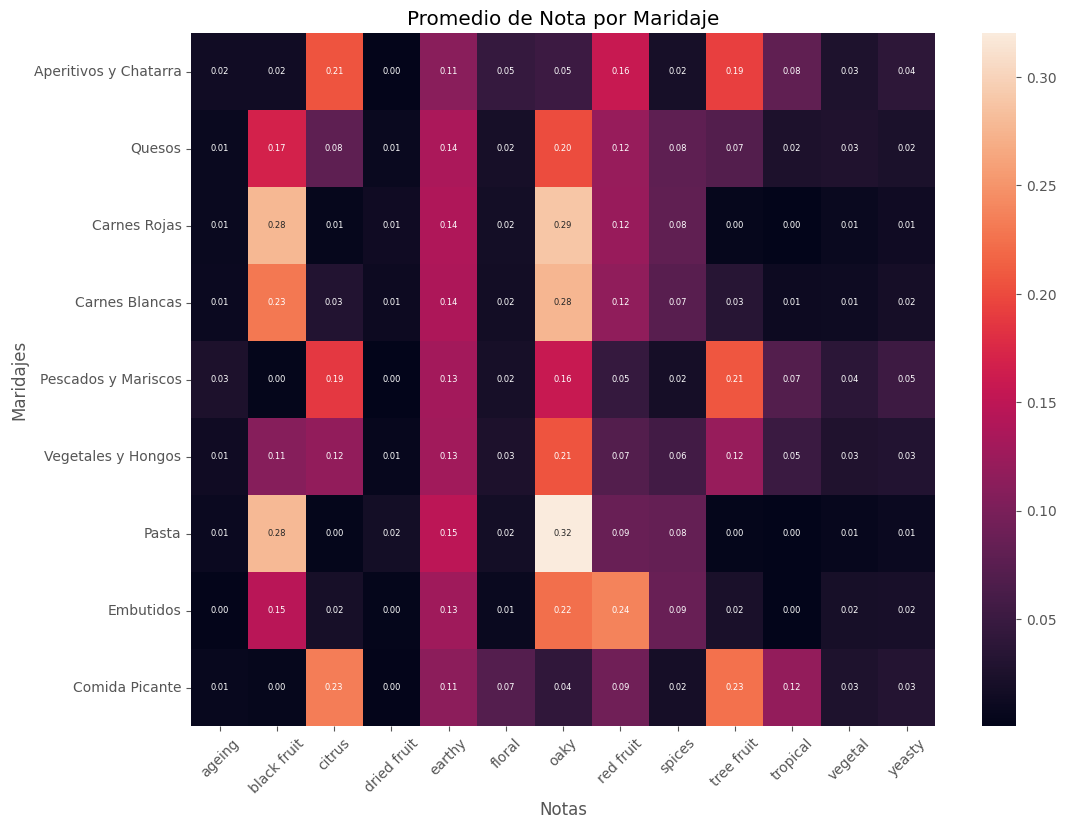

In [24]:
pairing_groups = {
    "Aperitivos y Chatarra": [
        "any junk food will do",
        "aperitif",
        "appetizers and snacks"
    ],
    "Quesos": [
        "blue cheese",
        "goat's milk cheese",
        "mature and hard cheese",
        "mild and soft cheese"
    ],
    "Carnes Rojas": [
        "beef",
        "lamb",
        "veal",
        "game (deer, venison)"
    ],
    "Carnes Blancas": [
        "pork",
        "poultry"
    ],
    "Pescados y Mariscos": [
        "lean fish",
        "rich fish (salmon, tuna etc)",
        "shellfish"
    ],
    "Vegetales y Hongos": [
        "mushrooms",
        "vegetarian"
    ],
    "Pasta": [
        "pasta"
    ],
    "Embutidos": [
        "cured meat"
    ],
    "Comida Picante": [
        "spicy food"
    ]
}

grouped_pairing_note_count = pd.DataFrame(0, index=list(pairing_groups.keys()), columns=notes)
grouped_pairing_note_count[notes] = grouped_pairing_note_count[notes].astype(float)

for pairing_group, pairings in pairing_groups.items():
    wine_with_pairing_group = wines[wines[pairings].any(axis=1)==1]
    mean_by_note = wine_with_pairing_group[notes].mean()
    grouped_pairing_note_count.loc[pairing_group] = mean_by_note

plt.figure(figsize=(12,9))
plt.title("Promedio de Nota por Maridaje")
sns.heatmap(grouped_pairing_note_count, annot=True, fmt=".2f", annot_kws={"size": 6})
plt.ylabel("Maridajes")
plt.xlabel("Notas")
plt.xticks(rotation=45)
plt.show()

__Uvas y Sabores__

Explicación

*Se escalaron los sabores (tastes) para poder compararlos sobre la misma escala.*

> - Body: destaca en varias uvas. Entre las más conocidas: Merlot, Petit Verdot, Cavernet Sauvignon, Syrah, Malbec. Muy baja presencia en Gruner Veltliner y Criolla Grande.

> - Taninos: presencia más pareja, con valores más elevados en Cavernet Franc, Sauvignon, Petit Verdot y Merlot. Se nota un valor muy reducido en Pinot Noir.

> - Dulzor: en general con un valor más bajo en todas las uvas. Elevado en Albariño, Bonarda, Sauvignon Blanc y Tannat. Reducido en Criolla Grande y Moscatel.

> - Acidez: tiene un valor más elevado en todas las uvas, destacando en Gruner Veltliner, Criolla Grande, Cavernet Franc y Sauvignon Blanc.

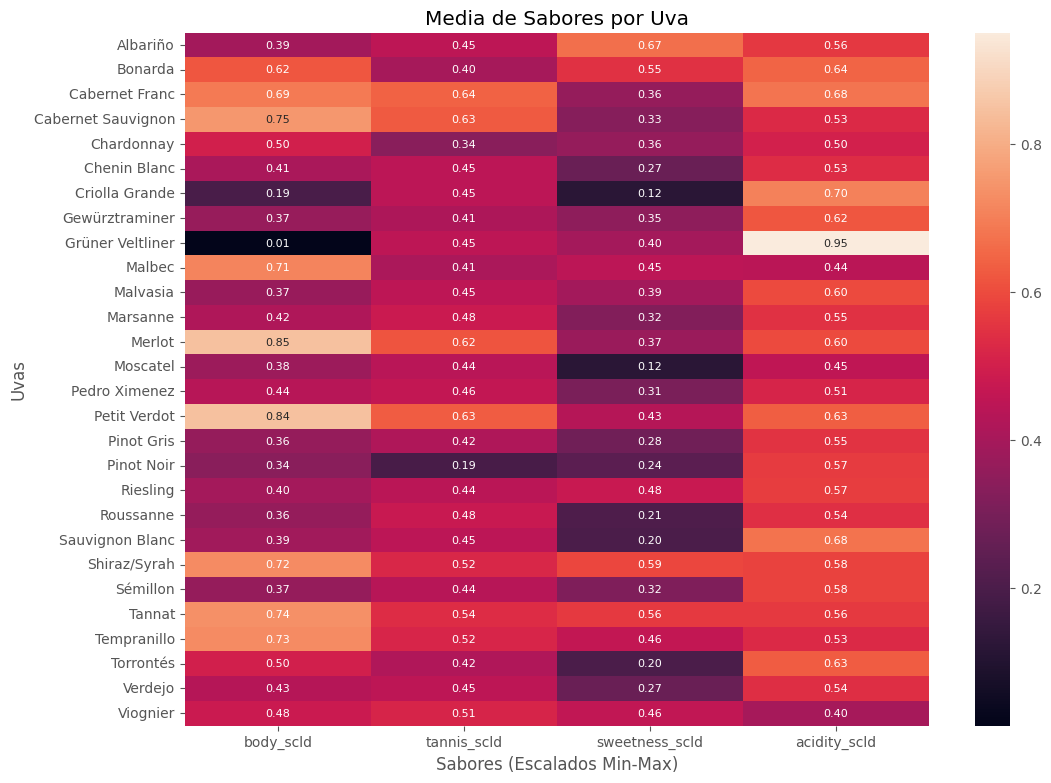

In [ ]:
tastes_dict = {
    "body": "body_scld",
    "tannins": "tannins_scld",
    "sweetness": "sweetness_scld",
    "acidity": "acidity_scld"
}

tastes_plain = list(tastes_dict.keys())
tastes_scld = list(tastes_dict.values())

grapes = pd.read_csv("../../src/data/processed/aux/grapes.csv")
grapes = grapes["grapes"].to_list()

mean_taste_by_grape = pd.DataFrame(0, index=grapes, columns=tastes_scld)
mean_taste_by_grape[tastes_scld] = mean_taste_by_grape[tastes_scld].astype(float)

scaler = MinMaxScaler()
columns_for_scaling = tastes_plain + grapes
scaled_wines = wines[columns_for_scaling].copy()

scaled_wines[tastes_scld] = scaler.fit_transform(scaled_wines[tastes_plain])

for grape in grapes:
    wines_with_grape = scaled_wines[scaled_wines[grape]==1]
    mean_grape_tastes = wines_with_grape[tastes_scld].mean()
    mean_taste_by_grape.loc[grape] = mean_grape_tastes

grapes_with_wines = mean_taste_by_grape.index[mean_taste_by_grape.sum(axis=1) > 0]
mean_taste_by_grape = mean_taste_by_grape.loc[grapes_with_wines]

plt.figure(figsize=(12,9))
plt.title("Media de Sabores por Uva")
sns.heatmap(mean_taste_by_grape, annot=True, fmt=".2f", annot_kws={"size": 8})
plt.ylabel("Uvas")
plt.xlabel("Sabores (Escalados Min-Max)")
plt.show()

__Uvas y Notas__

Existe una gran variedad de combinaciones. Respecto a las principales:

> - Black Fruit: presente sobre todo en Malbec, Petit Verdot y Merlot, con cierta presencia en Cavernet y Syrah.

> - Citrus: se nota una relación negativa con Black Fruit, destacando justamente en las uvas con poca presencia de Frutos Negros. Se ve en uvas de tipo Malvasia, Verdejo, Pinot Gris, Sauvignon Blanc, entre otros.

> - Earthy: con presencia pareja en todas las uvas, destacando en las Vermejo.

> - Oaky: coincide bastante con la presencia de fruta negra (Black Fruit), presente en Merlot, Petit Verdot, Tannat, Malbec, Syrah, Cavernet Franc y Sauvignon, entre otros.

> - Red Fruit: muy notable en Criolla Grande y Pinot Noir.

> - Tree Fruit: también bastante ligado a la presencia de notas cítricas, destaca en Gruner Veltliner, Roussanne, Malvasia, Marsanne, entre otros.

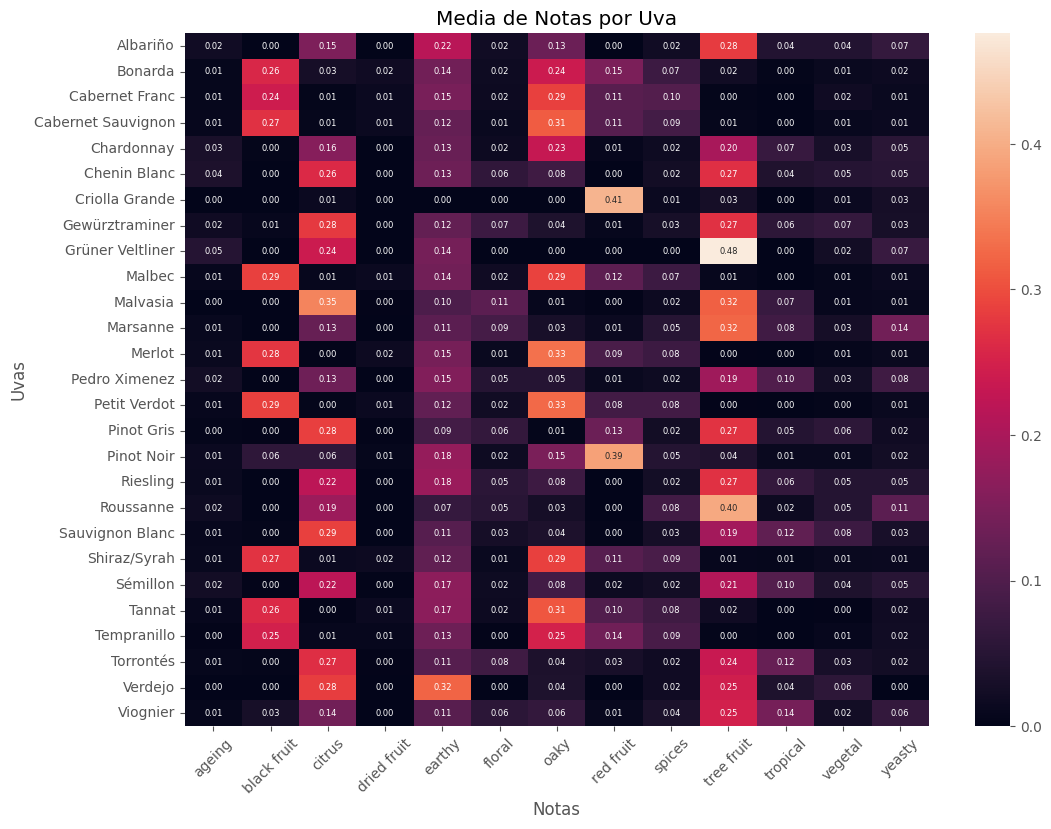

In [26]:
grapes = pd.read_csv("../../src/data/processed/aux/grapes.csv")
grapes = grapes["grapes"].to_list()

notes = pd.read_csv("../../src/data/processed/aux/notes.csv")
notes = notes["notes"].to_list()

grape_note_mean = pd.DataFrame(0, index=grapes, columns=notes)
grape_note_mean[notes] = grape_note_mean[notes].astype(float)

for grape in grapes:
    wines_with_grape = wines[wines[grape]==1]
    mean_notes_in_grape = wines_with_grape[notes].mean()
    grape_note_mean.loc[grape] = mean_notes_in_grape


grapes_with_wines = grape_note_mean.index[grape_note_mean.sum(axis=1) > 0]
grape_note_mean = grape_note_mean.loc[grapes_with_wines]

plt.figure(figsize=(12,9))
plt.title("Media de Notas por Uva")
sns.heatmap(grape_note_mean, annot=True, fmt=".2f", annot_kws={"size": 6})
plt.ylabel("Uvas")
plt.xlabel("Notas")
plt.xticks(rotation=45)
plt.show()

__Notas y Sabores__

*Se escalaron los sabores (tastes) para poder compararlos sobre la misma escala.*

> - Body: muy relacionado a notas amaderadas (oaky) y de frutos negros. Relacionado negativamente en notas cítricas, tropicales y derivados.

> - tannins: relación más pareja, destacando con sabores especiados (spices) y con frutos rojos (negativamente).

> - Sweetness: relacionado a frutos negros y notas amaderadas (oaky), mientras que contrario a sabores de tipo cítricos y derivados.

> - Acidity: nuy ligado a sabores cítricos, vegetales y derivados, contrario a notas amaderadas (oaky) y de frutos negros.

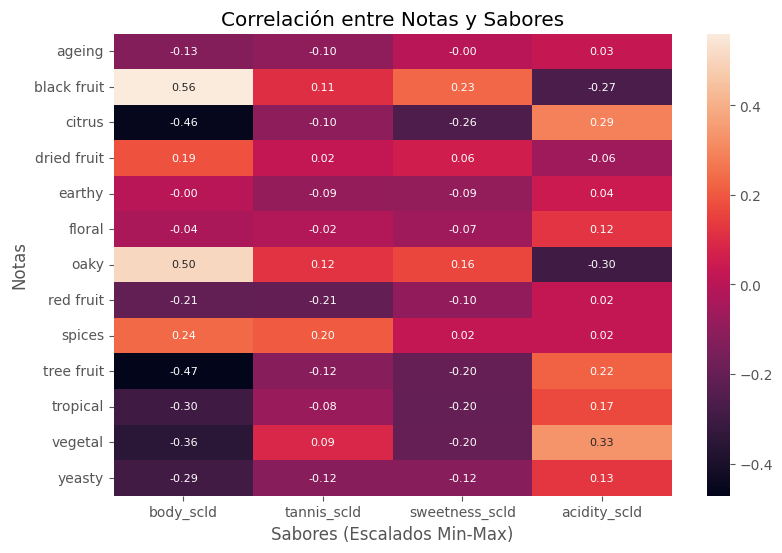

In [ ]:
# En este caso aplicamos matriz de correlación, ya que son dos valores float
tastes_dict = {
    "body": "body_scld",
    "tannins": "tannins_scld",
    "sweetness": "sweetness_scld",
    "acidity": "acidity_scld"
}

tastes_plain = list(tastes_dict.keys())
tastes_scld = list(tastes_dict.values())

notes = pd.read_csv("../../src/data/processed/aux/notes.csv")
notes = notes["notes"].to_list()

scaler = MinMaxScaler()
columns_for_scaling = tastes_plain + notes
scaled_wines = wines[columns_for_scaling].copy()

scaled_wines[tastes_scld] = scaler.fit_transform(scaled_wines[tastes_plain])

complete_corr_matrix = scaled_wines.corr()
sliced_corr_matrix = complete_corr_matrix.loc[notes, tastes_scld]

plt.title("Correlación entre Notas y Sabores")
sns.heatmap(sliced_corr_matrix, annot=True, fmt=".2f", annot_kws={"size": 8})
plt.ylabel("Notas")
plt.xlabel("Sabores (Escalados Min-Max)")
plt.show()

### Relación de Rating y Perfiles de Sabor

El objetivo de este apartado es entender como se relacionan los perfiles de sabor de los vinos con la calidad percibida por el usuario.

- ¿Qué perfiles de sabor presentan los vinos de mayor calidad?

> Los vinos de mayor calidad promedio suelen tener alto cuerpo (más de 0.6 o 0.7), tánicos intermedios (entre 0.3 y 0.6, aunque más cerca de la media mejor - 0.4), con un dulzor en la media o superándola levemente (0.2) y puede tener un amplio rango de acidez sin tocar extremos (entre 0.3 a 0.6). 

---

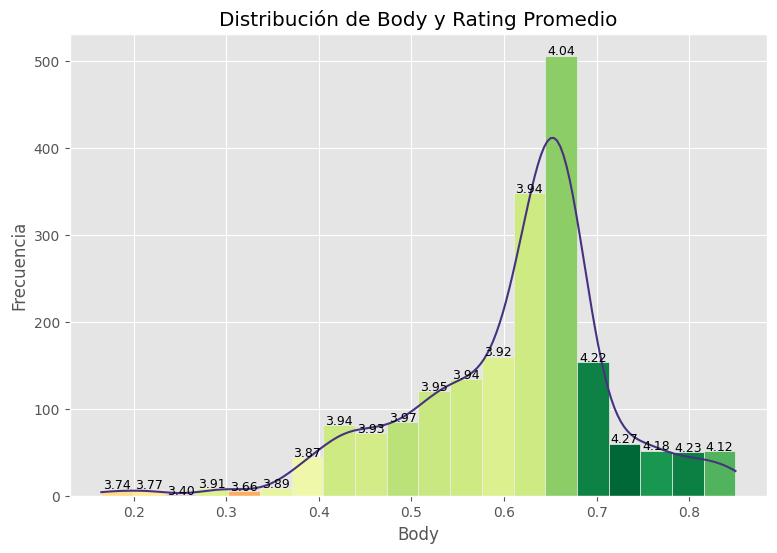

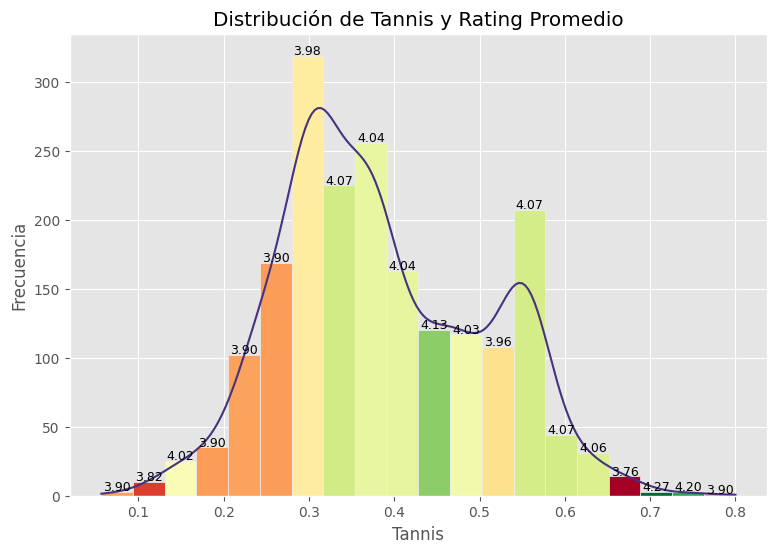

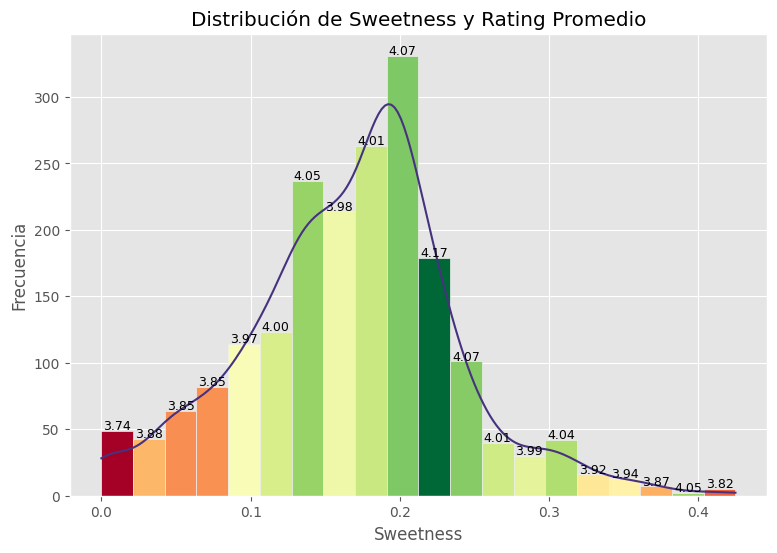

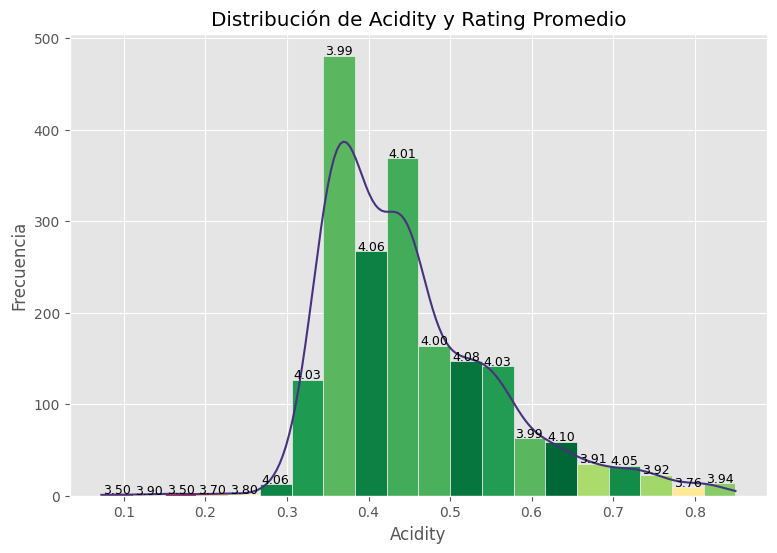

In [ ]:
taste_columns = ["body", "tannins", "sweetness", "acidity"]

for column in taste_columns:

    # Crear bins e histograma
    bin_edges = np.histogram_bin_edges(wines[column], bins=20)
    wines[column + "_bin"] = pd.cut(wines[column], bins=bin_edges, include_lowest=True)
    hist = sns.histplot(wines[column], kde=True, bins=20)
    plt.title(f"Distribución de {column.capitalize()} y Rating Promedio")

    # Calcular la altura de las barras y la media de ratings por bin
    bin_heights = [h.get_height() for h in hist.patches]
    average_ratings = wines.groupby(column + "_bin", observed = False)["rating"].mean()

    # Agregar colores
    norm = Normalize(average_ratings.min(), average_ratings.max())
    cmap = cm.RdYlGn

    # Crear las barras con su label de rating promedio y color acorde
    for i, bar in enumerate(hist.patches):
        avg_rating = average_ratings.iloc[i]
        bar.set_facecolor(cmap(norm(avg_rating)))
        plt.text(bin_edges[i] + (bin_edges[i+1] - bin_edges[i])/2,
                 bin_heights[i] + 1,
                 f"{avg_rating:.2f}",
                 ha="center",
                 fontsize=9)

    plt.xlabel(column.capitalize())
    plt.ylabel("Frecuencia")
    plt.show()